## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""

In [16]:
import os
import keras
import tensorflow as tf
# 請嘗試設定 GPU：os.environ
# os.environ["CUDA_VISIBLE_DEVICES"] = ""
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333) ##每个gpu占用0.333 的显存
config=tf.compat.v1.ConfigProto(gpu_options=gpu_options, allow_soft_placement=True)
sess=tf.compat.v1.Session(config=config)##如果电脑有多个GPU，tensorflow默认全部使用。如果想只使用部分GPU，可以设置CUDA_VISIBLE_DEVICES。


In [17]:
train, test = keras.datasets.cifar10.load_data()

In [18]:
train

(array([[[[ 59,  62,  63],
          [ 43,  46,  45],
          [ 50,  48,  43],
          ...,
          [158, 132, 108],
          [152, 125, 102],
          [148, 124, 103]],
 
         [[ 16,  20,  20],
          [  0,   0,   0],
          [ 18,   8,   0],
          ...,
          [123,  88,  55],
          [119,  83,  50],
          [122,  87,  57]],
 
         [[ 25,  24,  21],
          [ 16,   7,   0],
          [ 49,  27,   8],
          ...,
          [118,  84,  50],
          [120,  84,  50],
          [109,  73,  42]],
 
         ...,
 
         [[208, 170,  96],
          [201, 153,  34],
          [198, 161,  26],
          ...,
          [160, 133,  70],
          [ 56,  31,   7],
          [ 53,  34,  20]],
 
         [[180, 139,  96],
          [173, 123,  42],
          [186, 144,  30],
          ...,
          [184, 148,  94],
          [ 97,  62,  34],
          [ 83,  53,  34]],
 
         [[177, 144, 116],
          [168, 129,  94],
          [179, 142,  87],
   

In [40]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
#     x = x / 255.
    x = (x - 127.5) / 127.5
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    


In [41]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [43]:
x_train.max(), x_train.min()

(1.0, -1.0)

In [44]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[1024, 512, 256, 128, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 10)                650 

In [45]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [46]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [47]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 5s 25ms/step - loss: 1.7006 - accuracy: 0.3975 - val_loss: 1.5368 - val_accuracy: 0.4620
Epoch 2/100
196/196 [==============================] - 5s 23ms/step - loss: 1.4643 - accuracy: 0.4861 - val_loss: 1.4309 - val_accuracy: 0.4989
Epoch 3/100
196/196 [==============================] - 5s 24ms/step - loss: 1.3403 - accuracy: 0.5272 - val_loss: 1.3882 - val_accuracy: 0.5146
Epoch 4/100
196/196 [==============================] - 5s 23ms/step - loss: 1.2468 - accuracy: 0.5596 - val_loss: 1.3632 - val_accuracy: 0.5171
Epoch 5/100
196/196 [==============================] - 4s 23ms/step - loss: 1.1476 - accuracy: 0.5935 - val_loss: 1.3773 - val_accuracy: 0.5272
Epoch 6/100
196/196 [==============================] - 5s 23ms/step - loss: 1.0652 - accuracy: 0.6241 - val_loss: 1.3865 - val_accuracy: 0.5359
Epoch 7/100
196/196 [==============================] - 5s 24ms/step - loss: 0.9787 - accuracy: 0.6522 - val_loss: 1.3948 - val_accuracy:

196/196 [==============================] - 5s 23ms/step - loss: 0.0878 - accuracy: 0.9715 - val_loss: 3.9548 - val_accuracy: 0.5392
Epoch 58/100
196/196 [==============================] - 5s 24ms/step - loss: 0.0873 - accuracy: 0.9723 - val_loss: 3.7070 - val_accuracy: 0.5431
Epoch 59/100
196/196 [==============================] - 5s 24ms/step - loss: 0.0819 - accuracy: 0.9737 - val_loss: 4.1410 - val_accuracy: 0.5427
Epoch 60/100
196/196 [==============================] - 5s 25ms/step - loss: 0.1045 - accuracy: 0.9674 - val_loss: 3.9951 - val_accuracy: 0.5333
Epoch 61/100
196/196 [==============================] - 5s 24ms/step - loss: 0.0814 - accuracy: 0.9742 - val_loss: 3.9325 - val_accuracy: 0.5467
Epoch 62/100
196/196 [==============================] - 5s 24ms/step - loss: 0.0780 - accuracy: 0.9747 - val_loss: 3.9655 - val_accuracy: 0.5418
Epoch 63/100
196/196 [==============================] - 5s 24ms/step - loss: 0.0653 - accuracy: 0.9795 - val_loss: 4.0936 - val_accuracy: 0.543

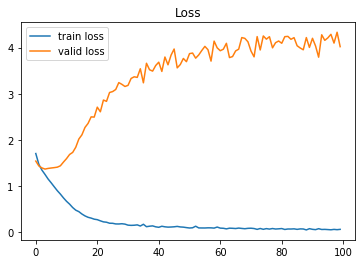

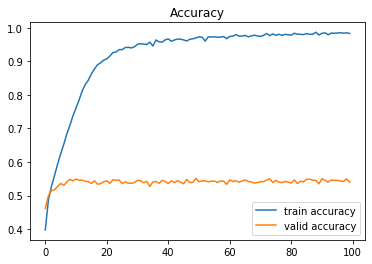

In [48]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

依舊是嚴重的overfitting